In [83]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Exercise 9
Create CNN from scratch and apply to MNIST dataset to get best accuracy possible

In [84]:
# Load in the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [85]:
# Check out our dimensions
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

# Scale the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


6


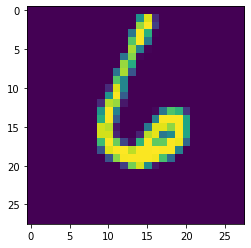

In [86]:
# Check out random samples of the data
import random
idx = random.randint(0, 60000)
plt.imshow(X_train_full[idx])
print(y_train_full[idx])

In [87]:
# Split training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=10000)

In [88]:
# Check the shapes
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

# Reshape to form single channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


In [89]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [90]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)              

In [93]:
# Compile and fit our model to the data
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                   validation_data = (X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 41s 825us/sample - loss: 0.1628 - acc: 0.9500 - val_loss: 0.0811 - val_acc: 0.9761
Epoch 2/10
50000/50000 [==============================] - 44s 880us/sample - loss: 0.0522 - acc: 0.9837 - val_loss: 0.0459 - val_acc: 0.9861
Epoch 3/10
50000/50000 [==============================] - 42s 850us/sample - loss: 0.0381 - acc: 0.9876 - val_loss: 0.0530 - val_acc: 0.9842
Epoch 4/10
50000/50000 [==============================] - 42s 839us/sample - loss: 0.0277 - acc: 0.9916 - val_loss: 0.0397 - val_acc: 0.9889
Epoch 5/10
50000/50000 [==============================] - 41s 817us/sample - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0418 - val_acc: 0.9884
Epoch 6/10
50000/50000 [==============================] - 41s 820us/sample - loss: 0.0172 - acc: 0.9945 - val_loss: 0.0471 - val_acc: 0.9875
Epoch 7/10
50000/50000 [==============================] - 40s 797us/sample - loss: 0.0158 - acc: 0.9947 

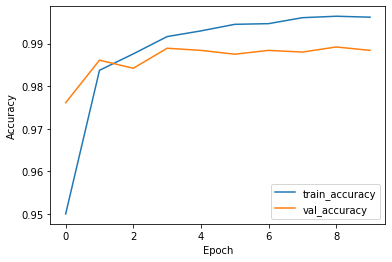

In [94]:
# Plot accuracy over epochs
plt.plot(history.history['acc'], label='train_accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [95]:
# Get final test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(test_accuracy)

10000/10000 - 3s - loss: 0.0421 - acc: 0.9900
0.99
